## Import necessary Python Libraries 

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [14]:
# Reading uber trip data with pandas dataframe
df=pd.read_csv('Uber-Jan-Feb-FOIL.csv')

### 1. Data Preprocessing

In [15]:
df

,dispatching_base_number,date,active_vehicles,trips
0,B02512,1/1/2015,190,1132
1,B02765,1/1/2015,225,1765
2,B02764,1/1/2015,3427,29421
3,B02682,1/1/2015,945,7679
4,B02617,1/1/2015,1228,9537
...,...,...,...,...
349,B02764,2/28/2015,3952,39812
350,B02617,2/28/2015,1372,14022
351,B02682,2/28/2015,1386,14472
352,B02512,2/28/2015,230,1803


In [16]:
df.head(5)

,dispatching_base_number,date,active_vehicles,trips
0,B02512,1/1/2015,190,1132
1,B02765,1/1/2015,225,1765
2,B02764,1/1/2015,3427,29421
3,B02682,1/1/2015,945,7679
4,B02617,1/1/2015,1228,9537


In [8]:
data.tail(5)

,dispatching_base_number,date,active_vehicles,trips
349,B02764,2/28/2015,3952,39812
350,B02617,2/28/2015,1372,14022
351,B02682,2/28/2015,1386,14472
352,B02512,2/28/2015,230,1803
353,B02765,2/28/2015,747,7753


In [18]:
df.shape

(354, 4)

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 354 entries, 0 to 353
Data columns (total 4 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   dispatching_base_number  354 non-null    object
 1   date                     354 non-null    object
 2   active_vehicles          354 non-null    int64 
 3   trips                    354 non-null    int64 
dtypes: int64(2), object(2)
memory usage: 11.2+ KB


In [19]:
df.describe()

,active_vehicles,trips
count,354.000000,354.000000
mean,1307.435028,11667.316384
std,1162.510626,10648.284865
min,112.000000,629.000000
25%,296.750000,2408.500000
50%,1077.000000,9601.000000
75%,1417.000000,13711.250000
max,4395.000000,45858.000000


In [31]:
df['date'] = pd.to_datetime(df['date'])

In [32]:
df.isnull().sum()

dispatching_base_number    0
date                       0
active_vehicles            0
trips                      0
dtype: int64

In [37]:
print(df.columns)

Index(['date', 'active_vehicles', 'trips', 'dispatching_base_number_B02598',
       'dispatching_base_number_B02617', 'dispatching_base_number_B02682',
       'dispatching_base_number_B02764', 'dispatching_base_number_B02765'],
      dtype='object')


In [42]:
# Convert 'date' column to datetime format if it's not already
df['date'] = pd.to_datetime(df['date'])

# Extract additional time-based features for more insights
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['day'] = df['date'].dt.day

In [43]:
df

,date,active_vehicles,trips,dispatching_base_number_B02598,dispatching_base_number_B02617,dispatching_base_number_B02682,dispatching_base_number_B02764,dispatching_base_number_B02765,year,month,day
0,2015-01-01,190,1132,False,False,False,False,False,2015,1,1
1,2015-01-01,225,1765,False,False,False,False,True,2015,1,1
2,2015-01-01,3427,29421,False,False,False,True,False,2015,1,1
3,2015-01-01,945,7679,False,False,True,False,False,2015,1,1
4,2015-01-01,1228,9537,False,True,False,False,False,2015,1,1
...,...,...,...,...,...,...,...,...,...,...,...
349,2015-02-28,3952,39812,False,False,False,True,False,2015,2,28
350,2015-02-28,1372,14022,False,True,False,False,False,2015,2,28
351,2015-02-28,1386,14472,False,False,True,False,False,2015,2,28
352,2015-02-28,230,1803,False,False,False,False,False,2015,2,28


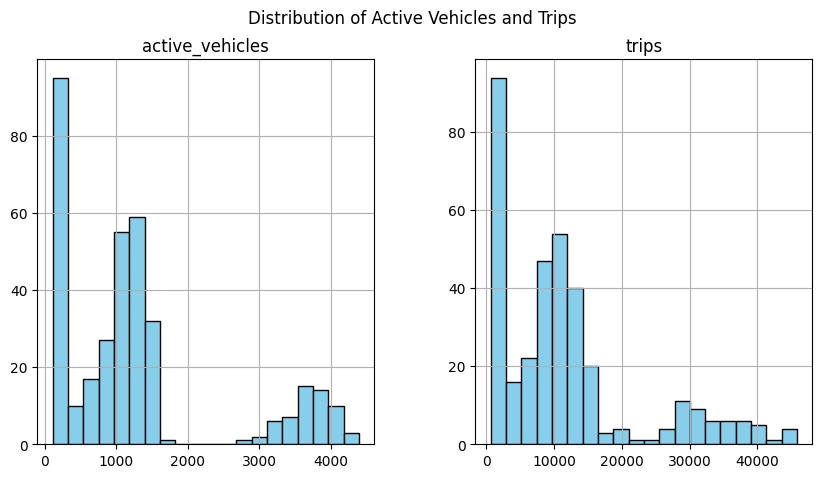

In [44]:
# Histograms to visualize distribution
df[['active_vehicles', 'trips']].hist(bins=20, figsize=(10, 5), color='skyblue', edgecolor='black')
plt.suptitle('Distribution of Active Vehicles and Trips')
plt.show()

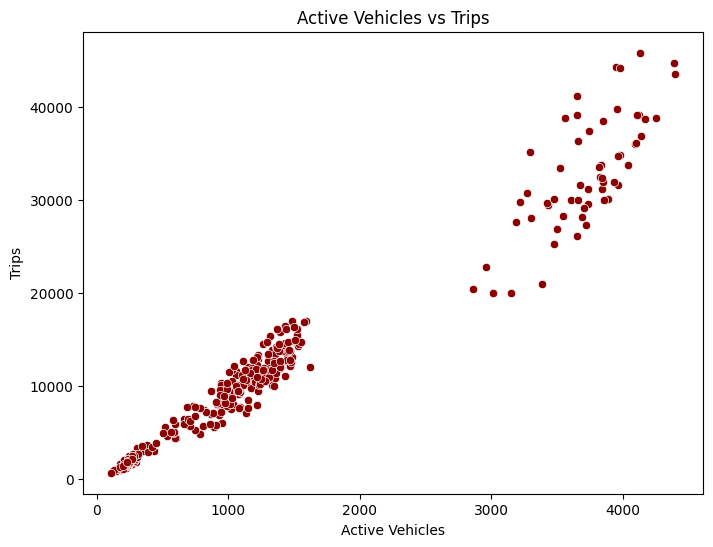

In [50]:
# Scatter plot to see correlation between active_vehicles and trips
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='active_vehicles', y='trips', color='darkred')
plt.title('Active Vehicles vs Trips')
plt.xlabel('Active Vehicles')
plt.ylabel('Trips')
plt.show()

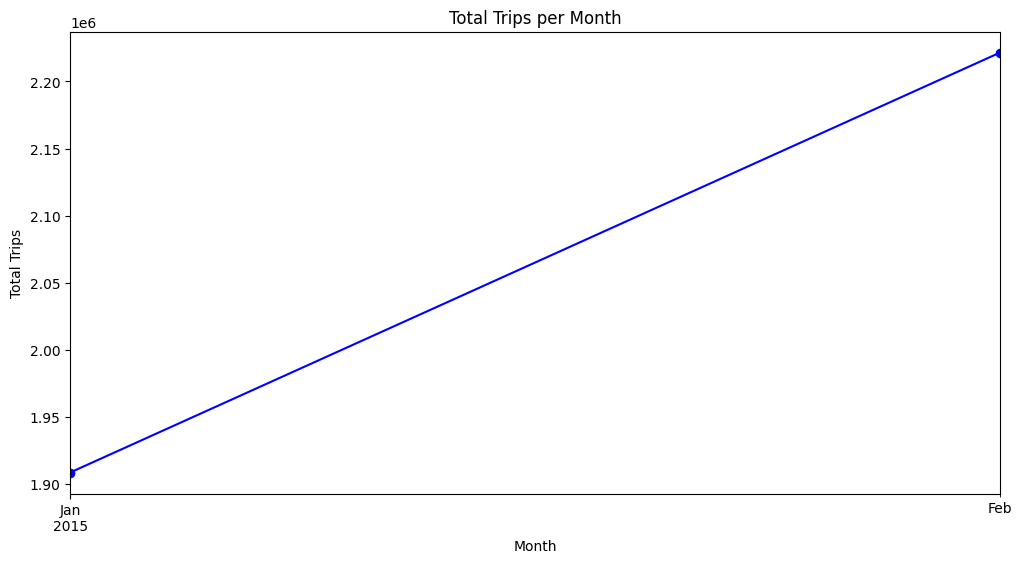

In [51]:
# Group data by month and sum trips
monthly_trips = df.groupby(df['date'].dt.to_period("M"))['trips'].sum()
monthly_trips.plot(kind='line', figsize=(12, 6), marker='o', color='blue')
plt.title('Total Trips per Month')
plt.xlabel('Month')
plt.ylabel('Total Trips')
plt.show()

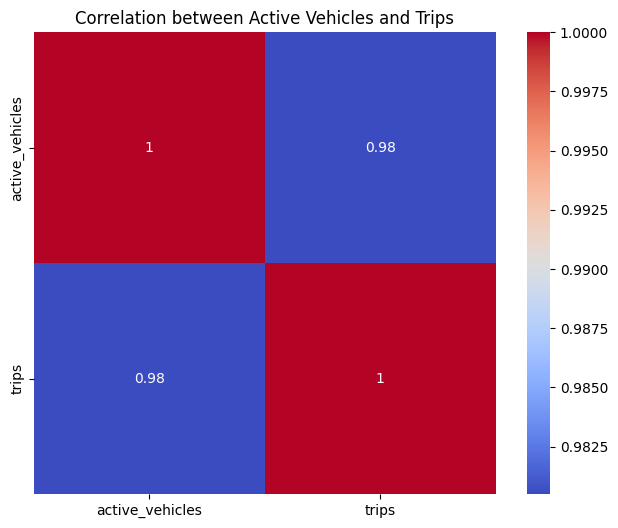

In [52]:
# Correlation heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(df[['active_vehicles', 'trips']].corr(), annot=True, cmap='coolwarm', square=True)
plt.title('Correlation between Active Vehicles and Trips')
plt.show()

### 3. Feature Engineering

In [59]:
# Convert the 'date' column to datetime type if not already
df['date'] = pd.to_datetime(df['date'])

# Extract Year, Month, Day, Day of Week, and Weekday from the 'date' column
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['day'] = df['date'].dt.day
df['weekday'] = df['date'].dt.weekday  # Monday=0, Sunday=6
df['day_of_week'] = df['date'].dt.day_name()  # Day name (e.g., Monday)
df['is_weekend'] = df['weekday'].apply(lambda x: 1 if x >= 5 else 0)  # 1 if weekend, else 0


In [60]:
df

,date,active_vehicles,trips,dispatching_base_number_B02598,dispatching_base_number_B02617,dispatching_base_number_B02682,dispatching_base_number_B02764,dispatching_base_number_B02765,year,month,day,weekday,day_of_week,is_weekend
0,2015-01-01,190,1132,False,False,False,False,False,2015,1,1,3,Thursday,0
1,2015-01-01,225,1765,False,False,False,False,True,2015,1,1,3,Thursday,0
2,2015-01-01,3427,29421,False,False,False,True,False,2015,1,1,3,Thursday,0
3,2015-01-01,945,7679,False,False,True,False,False,2015,1,1,3,Thursday,0
4,2015-01-01,1228,9537,False,True,False,False,False,2015,1,1,3,Thursday,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
349,2015-02-28,3952,39812,False,False,False,True,False,2015,2,28,5,Saturday,1
350,2015-02-28,1372,14022,False,True,False,False,False,2015,2,28,5,Saturday,1
351,2015-02-28,1386,14472,False,False,True,False,False,2015,2,28,5,Saturday,1
352,2015-02-28,230,1803,False,False,False,False,False,2015,2,28,5,Saturday,1


In [62]:
# Active vehicles per trip (efficiency measure)
df['active_vehicles_per_trip'] = df['active_vehicles'] / df['trips']

# Trips per vehicle (vehicle usage efficiency)
df['trips_per_vehicle'] = df['trips'] / df['active_vehicles']


In [64]:
df.head()

,date,active_vehicles,trips,dispatching_base_number_B02598,dispatching_base_number_B02617,dispatching_base_number_B02682,dispatching_base_number_B02764,dispatching_base_number_B02765,year,month,day,weekday,day_of_week,is_weekend,active_vehicles_per_trip,trips_per_vehicle
0,2015-01-01,190,1132,False,False,False,False,False,2015,1,1,3,Thursday,0,0.167845,5.957895
1,2015-01-01,225,1765,False,False,False,False,True,2015,1,1,3,Thursday,0,0.127479,7.844444
2,2015-01-01,3427,29421,False,False,False,True,False,2015,1,1,3,Thursday,0,0.116481,8.585060
3,2015-01-01,945,7679,False,False,True,False,False,2015,1,1,3,Thursday,0,0.123063,8.125926
4,2015-01-01,1228,9537,False,True,False,False,False,2015,1,1,3,Thursday,0,0.128762,7.766287


In [65]:
from sklearn.preprocessing import StandardScaler

# Scale numerical features
scaler = StandardScaler()
df[['active_vehicles', 'trips', 'active_vehicles_per_trip', 'trips_per_vehicle']] = scaler.fit_transform(
    df[['active_vehicles', 'trips', 'active_vehicles_per_trip', 'trips_per_vehicle']]
)


In [66]:
df

,date,active_vehicles,trips,dispatching_base_number_B02598,dispatching_base_number_B02617,dispatching_base_number_B02682,dispatching_base_number_B02764,dispatching_base_number_B02765,year,month,day,weekday,day_of_week,is_weekend,active_vehicles_per_trip,trips_per_vehicle
0,2015-01-01,-0.962586,-0.990791,False,False,False,False,False,2015,1,1,3,Thursday,0,2.075634,-1.766354
1,2015-01-01,-0.932436,-0.931261,False,False,False,False,True,2015,1,1,3,Thursday,0,0.292994,-0.476879
2,2015-01-01,1.825846,1.669641,False,False,False,True,False,2015,1,1,3,Thursday,0,-0.192672,0.029338
3,2015-01-01,-0.312211,-0.375080,False,False,True,False,False,2015,1,1,3,Thursday,0,0.097981,-0.284484
4,2015-01-01,-0.068427,-0.200345,False,True,False,False,False,2015,1,1,3,Thursday,0,0.349650,-0.530301
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
349,2015-02-28,2.278094,2.646860,False,False,False,True,False,2015,2,28,5,Saturday,1,-0.952918,1.046966
350,2015-02-28,0.055618,0.221446,False,True,False,False,False,2015,2,28,5,Saturday,1,-1.015642,1.146915
351,2015-02-28,0.067678,0.263766,False,False,True,False,False,2015,2,28,5,Saturday,1,-1.107282,1.298273
352,2015-02-28,-0.928129,-0.927687,False,False,False,False,False,2015,2,28,5,Saturday,1,0.296811,-0.480511


# Now we will going to do data Visulation on uber trip dataset

<Axes: xlabel='active_vehicles', ylabel='trips'>

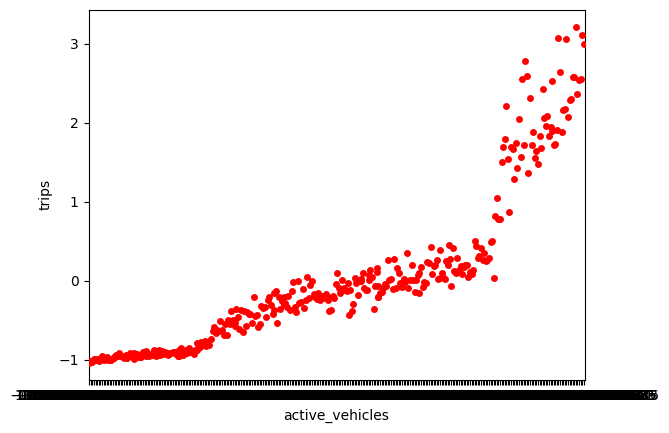

In [67]:
sns.stripplot(data=df, x = 'active_vehicles', y = 'trips', color='r')

<Axes: xlabel='trips', ylabel='active_vehicles'>

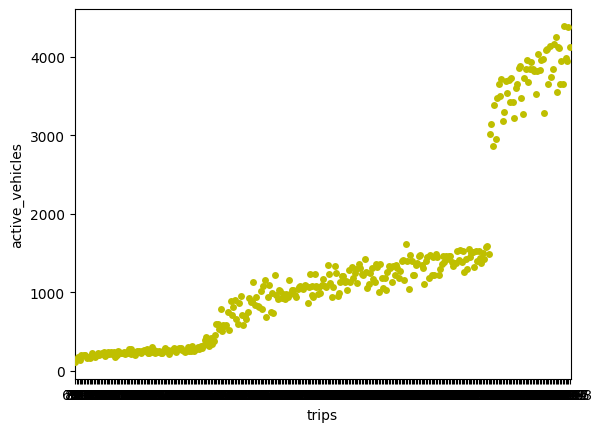

In [28]:
sns.stripplot(data=df, x = 'trips', y = 'active_vehicles', color='y')

<Axes: xlabel='active_vehicles'>

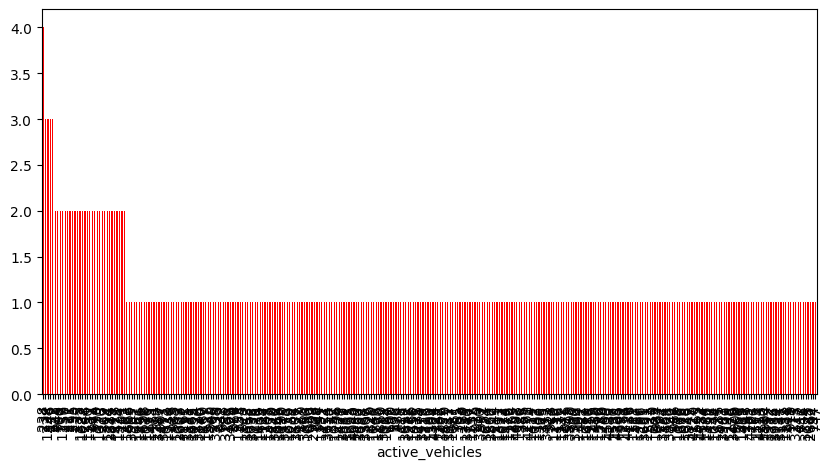

In [30]:
df['active_vehicles'].value_counts().plot(kind='bar', figsize=(10, 5), color='red')